In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "data/mse250_lab03.csv"

df = pd.read_csv(filename, skiprows=0, delimiter=',')

In [11]:
# Extract the nominal values from "cal block val"
df['nominal_val'] = df['cal block val'].str.extract(r'([\d\.]+)').astype(float)

# # Group by nominal values
# groups = df.groupby('nominal_val')

# Group by instrument (scale column)
groups = df.groupby('scale')

print(groups.head(n=5))

   scale cal block val  measured val  nominal_val
0     C1   25.4 +- 1.0          25.0         25.4
1     C1   25.4 +- 1.0          25.2         25.4
2     C1     42.1+-1.0          42.0         42.1
3     C1     42.1+-1.0          42.2         42.1
4     B3   53.3 +- 2.5          55.0         53.3
5     B2   55.3 +- 2.5          56.0         55.3
6     B2   55.3 +- 2.5          56.5         55.3
7     B4   58.8 +- 2.5          59.0         58.8
8     B4   58.8 +- 2.5          59.5         58.8
9     C1    63.8 +-0.5          64.0         63.8
11    B4     70.5+-2.5          70.0         70.5
12    B2   76.2 +- 2.5          76.0         76.2
13    B3    76.2 +-2.5          75.0         76.2
14    B2     76.2+-2.5          76.0         76.2
15    B3    76.5 +-2.5          76.0         76.5
16    B4      92.3 +-1          91.5         92.3
17    B3   92.5 +- 1.0          93.0         92.5
18    B4       92.5+-1          92.0         92.5
19    B3       92.5+-1          92.5         92.5


0     25.4
1     25.4
2     42.1
3     42.1
4     53.3
5     55.3
6     55.3
7     58.8
8     58.8
9     63.8
10    63.8
11    70.5
12    76.2
13    76.2
14    76.2
15    76.5
16    92.3
17    92.5
18    92.5
19    92.5
20    92.5
21    92.5
Name: nominal_val, dtype: float64
0     25.4
1     25.4
2     42.1
3     42.1
4     53.3
5     55.3
6     55.3
7     58.8
8     58.8
9     63.8
10    63.8
11    70.5
12    76.2
13    76.2
14    76.2
15    76.5
16    92.3
17    92.5
18    92.5
19    92.5
20    92.5
21    92.5
Name: nominal_val, dtype: float64


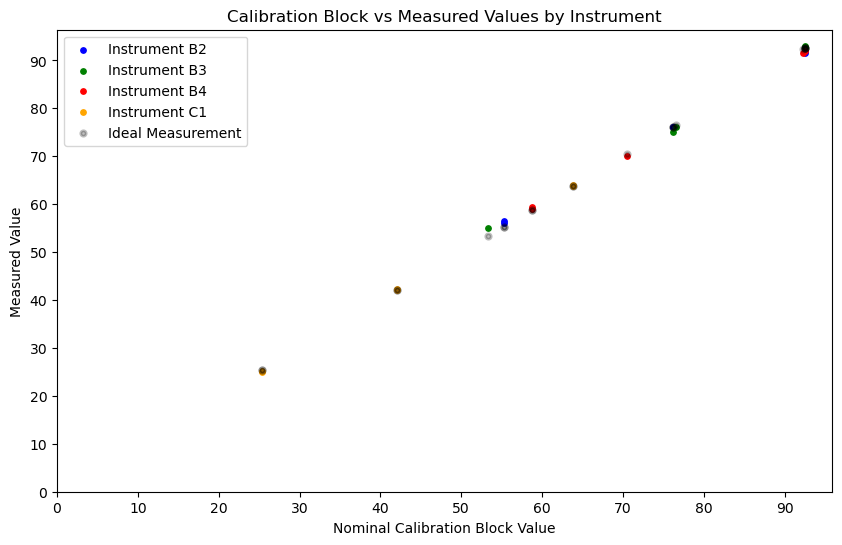

In [59]:
# Define colors and markers for better visualization
colors = ['blue', 'green', 'red', 'orange']
markers = ['o', 'o', 'o', 'o']

plt.figure(figsize=(10,6))

# Loop through each group and plot
for (instrument, group), color, marker in zip(groups, colors, markers):
    plt.scatter(group['nominal_val'], group['measured val'], 
                label=f'Instrument {instrument}', color=color, marker=marker, s=15)


# Fit a linear regression model for all data points
x = df['nominal_val']
y = df['nominal_val']

print(x)
print(y)

# # Compute linear regression line (y = mx + b)
# m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (linear regression)

# # Generate regression line points
# x_reg = np.linspace(min(x), max(x), 100)  # 100 points for a smooth line
# y_reg = m * x_reg + b  # Compute corresponding y values

# Plot the regression line
plt.scatter(x, y, color='black', marker='o', linewidth=2, label="Ideal Measurement", alpha=0.25, s=15)


plt.xlabel("Nominal Calibration Block Value")
plt.ylabel("Measured Value")
plt.title("Calibration Block vs Measured Values by Instrument")

plt.xticks(np.arange(0,100,10))

plt.yticks(np.arange(0,100,10))

# plt.legend(title="Instruments", loc='best')
plt.legend(loc='best')
# plt.grid()